# Analyzing with iNNvestigate

In [1]:
import os

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
    if not os.path.exists("/content/innvestigate"):
        !git clone https://github.com/albermax/innvestigate.git
        !pip install /content/innvestigate --no-deps
    %cd /content/innvestigate/examples/notebooks
except Exception:
    IS_COLAB = False


### Training a network

To analyze a network, we need a network! As a base for **iNNvestigate** we chose the Keras deep learning library, because it is easy to use and allows to inspect build models.

In this first piece of code we import all the necessary modules:

In [2]:
import warnings

warnings.simplefilter("ignore")

In [3]:
%matplotlib inline

import imp
import os

import matplotlib.pyplot as plot
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

tf.compat.v1.disable_eager_execution()

import innvestigate

# Use utility libraries to focus on relevant iNNvestigate routines.
import utils.mnist as mnistutils

In [4]:
innvestigate.__version__

'2.0.1'

## Analyzer works perfect with Conv2D

Instructions for updating:
Colocations handled automatically by placer.


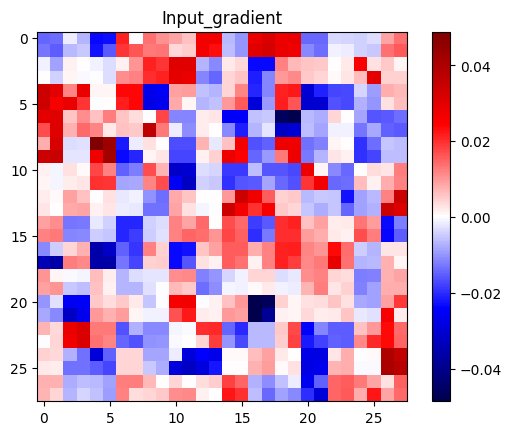

In [5]:
########################################
###############  2D example ############
########################################
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import innvestigate

# === 1. Disable eager execution ===
tf.compat.v1.disable_eager_execution()

# === 2. Clear the default graph ===
tf.compat.v1.reset_default_graph()

# === 3. Define your model ===
def build_flat_cnn_model(input_shape=(28, 28, 1), output_classes=10, hidden_units=64, activation='selu'):
    inputs = Input(shape=input_shape, name="input_layer")
    x = Conv2D(4, 1, kernel_initializer='he_uniform', activation='selu', padding='same', name='block1_conv1')(inputs)
    x = BatchNormalization()(x)
    x = AveragePooling2D(2, strides=2, name='block1_pool')(x)
    x = Flatten()(x)
    x = Dense(hidden_units, activation=activation)(x)
    outputs = Dense(output_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    return model

# === 4. Create and initialize model ===
model = build_flat_cnn_model()
model_wo_sm = innvestigate.model_wo_softmax(model)

# === 5. Start a TF1-style session and initialize variables ===
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

# === 6. Set this session as default for Keras backend (manually) ===
tf.compat.v1.keras.backend.set_session(sess)

# === 7. Analyze ===
image = np.random.rand(1, 28, 28, 1).astype(np.float32)
analyzer = innvestigate.create_analyzer("input_t_gradient", model_wo_sm)
analysis = analyzer.analyze(image)

# === 8. Plot ===
plt.imshow(analysis.squeeze(), cmap="seismic")
plt.title("Input_gradient")
plt.colorbar()
plt.show()


## Here is the problem when use Conv1D

In [ ]:
########################################
###############  1D example ############
########################################

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv1D, AveragePooling1D, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import innvestigate

# === 1. Disable eager execution ===
tf.compat.v1.disable_eager_execution()

# === 2. Clear the default graph ===
tf.compat.v1.reset_default_graph()

# === 3. Define your model ===
def build_flat_cnn_1d_model(input_shape=(28, 1), output_classes=256, hidden_units=64, activation='selu'):
    inputs = Input(shape=input_shape, name="input_layer")
    x = Conv1D(4, 1, kernel_initializer='he_uniform', activation='selu', padding='same')(inputs) # changed here to 1D
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x) # changed here to 1D
    x = Flatten()(x)
    x = Dense(hidden_units, activation=activation)(x)
    outputs = Dense(output_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# === 4. Create and initialize model ===
model = build_flat_cnn_1d_model()
model_wo_sm = innvestigate.model_wo_softmax(model)

# === 5. Start a TF1-style session and initialize variables ===
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

# === 6. Set this session as default for Keras backend (manually) ===
tf.compat.v1.keras.backend.set_session(sess)

# === 7. Analyze ===
image = np.random.rand(1, 28, 1).astype(np.float32)
analyzer = innvestigate.create_analyzer("input_t_gradient", model_wo_sm)
analysis = analyzer.analyze(image)

# === 8. Plot ===
plt.imshow(analysis.squeeze()[np.newaxis, :], cmap="seismic", aspect="auto")
plt.title("Input_gradient")
plt.colorbar()
plt.show()


## Use Conv1D, only LRP.z works

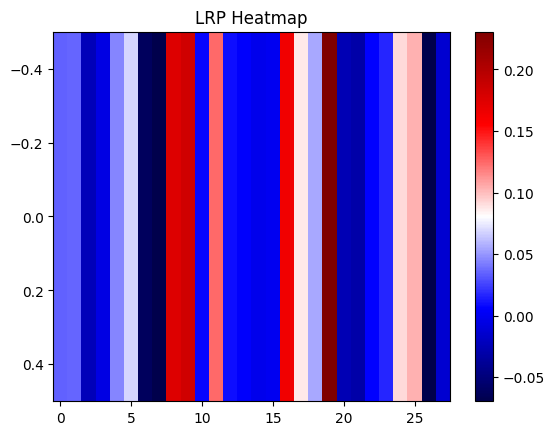

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv1D, AveragePooling1D, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import innvestigate

# === 1. Disable eager execution ===
tf.compat.v1.disable_eager_execution()

# === 2. Clear the default graph ===
tf.compat.v1.reset_default_graph()

# === 3. Define your model ===
def build_flat_cnn_1d_model(input_shape=(28, 1), output_classes=256, hidden_units=64, activation='selu'):
    inputs = Input(shape=input_shape, name="input_layer")
    x = Conv1D(4, 1, kernel_initializer='he_uniform', activation='selu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)
    x = Flatten()(x)
    x = Dense(hidden_units, activation=activation)(x)
    outputs = Dense(output_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# === 4. Create and initialize model ===
model = build_flat_cnn_1d_model()
model_wo_sm = innvestigate.model_wo_softmax(model)

# === 5. Start a TF1-style session and initialize variables ===
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

# === 6. Set this session as default for Keras backend (manually) ===
tf.compat.v1.keras.backend.set_session(sess)

# === 7. Analyze ===
image = np.random.rand(1, 28, 1).astype(np.float32)
analyzer = innvestigate.create_analyzer("lrp.z", model_wo_sm)
analysis = analyzer.analyze(image)

# === 8. Plot ===
plt.imshow(analysis.squeeze()[np.newaxis, :], cmap="seismic", aspect="auto")
plt.title("LRP Heatmap")
plt.colorbar()
plt.show()
